<a href="https://colab.research.google.com/github/Duck-Sung/islp/blob/main/Ch2_statlearn_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2.3.2 Basic Commands

In [1]:
print('fit a model with',11,'variables')

fit a model with 11 variables


In [2]:
print?

In [3]:
3+8

11

In [4]:
"hello" + " " + "world"

'hello world'

# 2.3.3 행렬계산(Introduction to Numerical Python)

In [ ]:
x = [3,4,5]
y = [4,9,7]
x + y

[3, 4, 5, 4, 9, 7]

[]는 리스트 객체를 묶는데 사용하고 임의의 객체를 가지고 있을 수있다. 숫자, 문자, 그리고 리스트 객체 등...
그래서 +(더하기) 연산자는 리스트 객체에 다른 객체를 추가(연결)하는 기능을 수행한다. 마치 문자열을 더하기(+)한것처럼
리스트객체으 숫자를 더하려면 다른 객체는 numpy객체를 사용해야한다.
예)
import numpy as np
 x = np.array([3,4,5])
 y = np.array([4,9,7])
 z = x + y
 z


In [ ]:
import numpy as np
x = np.array([3,4,5])
y = np.array([4,9,7])
z = x + y
z

array([ 7, 13, 12])

numpy 2차원이상은 행열(matrix) 1차원은 벡터(vector)로 표현함
넘파이 객체는 속성(Attribute)과 함수(Function)를 가지고 있음

In [ ]:
x = np.array([[1,2],[3,4]])
print(x.ndim,x.dtype,x.shape)

2 int64 (2, 2)


In [ ]:
np.array([[1,2],[3,4]],float).dtype

dtype('float64')

In [ ]:
x = np.array([1,2,3,4])
print(np.sum(x),x.sum(),x.mean(),x.max(),x.min(),x.var(),x.std())

10 10 2.5 4 1 1.25 1.118033988749895


array 에 들어있는 내용으로 배열을 재구성하는 함수는 reshape()
T함수는 가로세로 순서를 변환(Transpose)하는 함수

In [ ]:
x = np.array([1,2,3,4,5,6])
print('beginning x:\n',x)
x_reshape1 = x.reshape((2,3))
x_reshape2 = x.reshape((-1,3)) #-1은 x의 값을 통해서 나머지 값으로 구하기 여기서는 2가 나올것임
print('reshape1 x:\n',x_reshape1)
print('reshape2 x:\n',x_reshape2)
print('reshape1 xT:\n',x_reshape1.T)

beginning x:
 [1 2 3 4 5 6]
reshape1 x:
 [[1 2 3]
 [4 5 6]]
reshape2 x:
 [[1 2 3]
 [4 5 6]]
reshape1 xT:
 [[1 4]
 [2 5]
 [3 6]]


In [ ]:
print(np.sqrt(x))
print(np.square(x))
print(x*2)

[1.         1.41421356 1.73205081 2.         2.23606798 2.44948974]
[ 1  4  9 16 25 36]
[ 2  4  6  8 10 12]


array 랜덤함수 np.random.normal(loc=0,scale=1,size)
loc: 평균
scale: 표준 편차
size: 난수의 개수

피어슨 상관 계수(Pearson Correlation Coefficient ,PCC)란 두 변수 X 와 Y 간의 선형 상관 관계를 계량화한 수치다. 피어슨 상관 계수는 +1과 -1 사이의 값을 가지며, +1은 완벽한 양의 선형 상관 관계, 0은 선형 상관 관계 없음, -1은 완벽한 음의 선형 상관 관계를 의미

상관계수(Correlation Coefficient) [[1.         0.76283442]
 [0.76283442 1.        ]]
Slope: 1.1083415182825809  intercept: 49.84890197122722


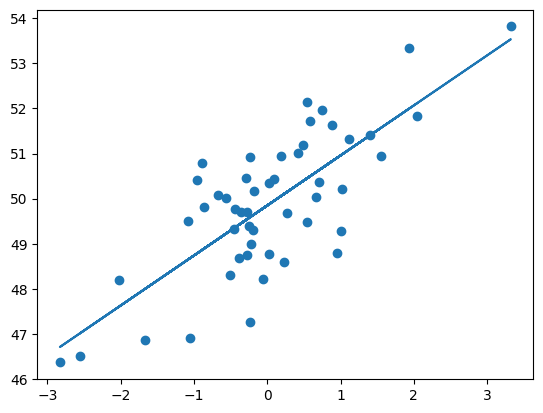

Sklearn의 결정계수: 0.5819163594378458
Statsmodels의 결정계수: 0.5819163594378454
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     66.81
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.20e-10
Time:                        09:41:54   Log-Likelihood:                -72.226
No. Observations:                  50   AIC:                             148.5
Df Residuals:                      48   BIC:                             152.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# 데이터 생성
rng = np.random.default_rng(3) # random seed사용하여 np.random.normal(0,1,50) 대신사용
x = rng.normal(0, 1, 50)
y = x + rng.normal(50, 1, 50)

# 상관계수 구하기
corrcoef = np.corrcoef(x,y)
print("상관계수(Correlation Coefficient)",corrcoef)

#그래프 그리기
import matplotlib.pyplot as plt

# 산포도 그래프를 그립니다.
plt.scatter(x, y)
(slope, intercept) = np.polyfit(x, y, 1) #x와 y 값을 통해서 1차함수기울기(slope)와 절편(intercept구하기
print('Slope:',slope,' intercept:',intercept)
# 선형회귀 그래프를 그립니다.
plt.plot(x, slope * x + intercept)
plt.show()

y1 = y.reshape((-1,1)) #1차원 행렬변환
x1 = x.reshape((-1,1)) #1차원 행렬변환
x = sm.add_constant(x) #상수1이 포함된 2차원 행렬변환
# sklearn의 선형 회귀 모델
sklearn_model = LinearRegression()
sklearn_model.fit(x1, y1)  # 상수항은 이미 추가되어 있으므로 첫 번째 열을 제외한 나머지 사용

# statsmodels의 OLS 모델
stats_model = sm.OLS(y1, x)
stats_model_results = stats_model.fit()

# 결정계수(R-squared) 출력
sklearn_r_squared = sklearn_model.score(x1, y1)
statsmodels_r_squared = stats_model_results.rsquared

print("Sklearn의 결정계수:", sklearn_r_squared)
print("Statsmodels의 결정계수:", statsmodels_r_squared)
print(stats_model_results.summary())


In [ ]:
## 랜덤 값을 고정하기위해 random seed 사용하기
rng = np.random.default_rng(3)
y = rng.standard_normal(10)
np.mean(y), y.mean()
X = np.array([[1,1],[2,2],[3,3]])
X
print(X.mean(axis=0)) #열기준
print(X.mean(axis=1)) #행기준


[2. 2.]
[1. 2. 3.]


# 2.3.4 그래픽(Graphics)

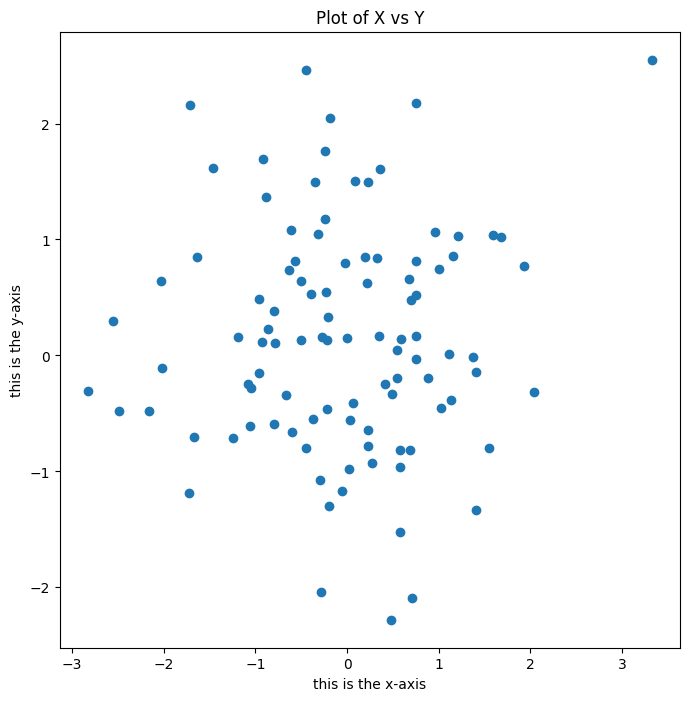

In [ ]:
#from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(8, 8))
rng = np.random.default_rng(3)
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.scatter(x, y, marker='o')
ax.set_xlabel("this is the x-axis")
ax.set_ylabel("this is the y-axis")
ax.set_title("Plot of X vs Y");
plt.show()


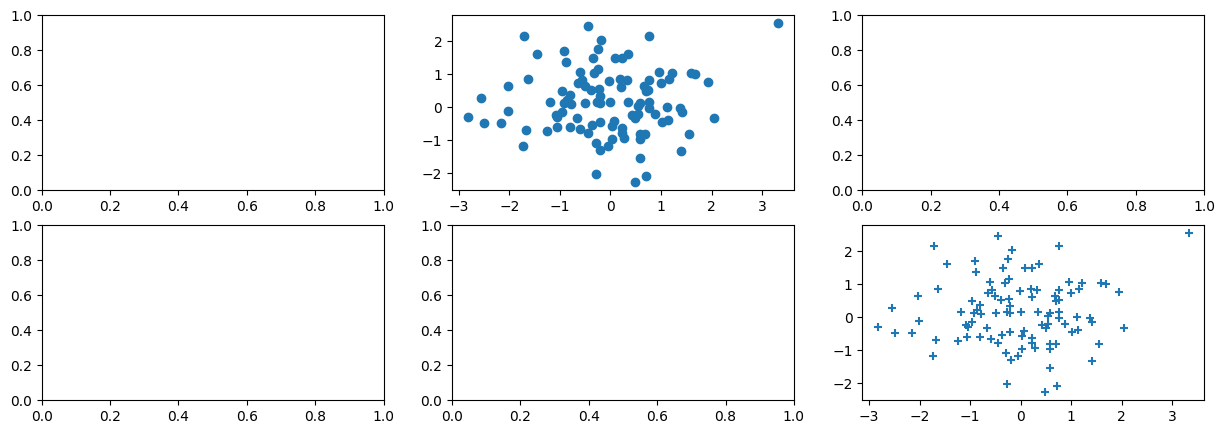

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15, 5)) #2행 3열 그림판 형성
axes[0,1].plot(x, y, 'o')
axes[1,2].scatter(x, y, marker='+')


[-3.14159265 -3.01336438 -2.88513611 -2.75690784 -2.62867957 -2.5004513
 -2.37222302 -2.24399475 -2.11576648 -1.98753821 -1.85930994 -1.73108167
 -1.60285339 -1.47462512 -1.34639685 -1.21816858 -1.08994031 -0.96171204
 -0.83348377 -0.70525549 -0.57702722 -0.44879895 -0.32057068 -0.19234241
 -0.06411414  0.06411414  0.19234241  0.32057068  0.44879895  0.57702722
  0.70525549  0.83348377  0.96171204  1.08994031  1.21816858  1.34639685
  1.47462512  1.60285339  1.73108167  1.85930994  1.98753821  2.11576648
  2.24399475  2.37222302  2.5004513   2.62867957  2.75690784  2.88513611
  3.01336438  3.14159265]


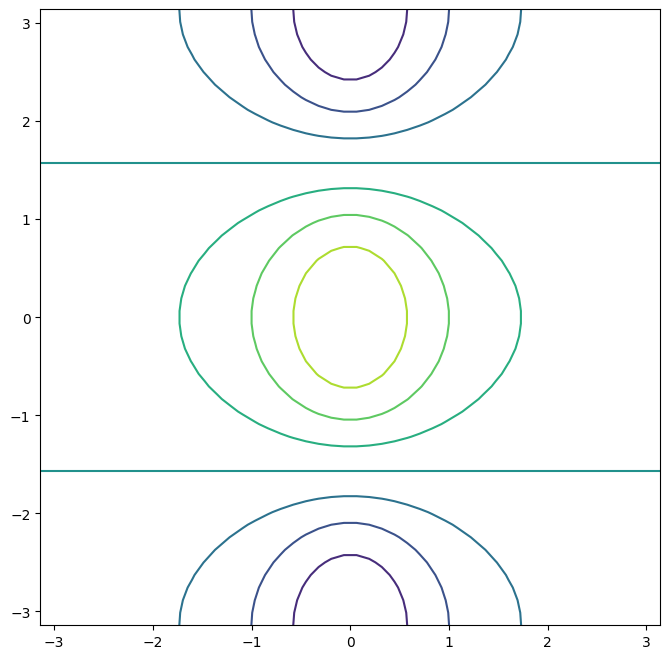

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
x = np.linspace(-np.pi, np.pi, 50)
print(x)
y=x
f = np.multiply.outer(np.cos(y), 1 / (1 + x**2))
ax.contour(x, y, f)

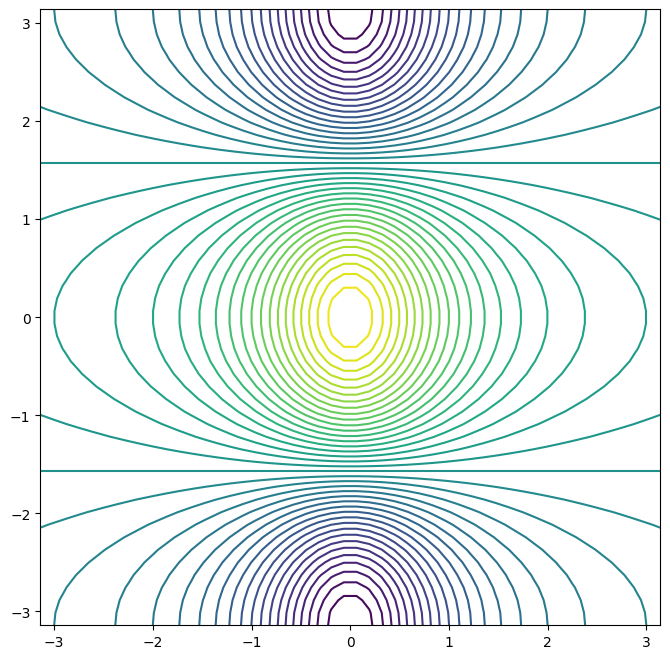

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.contour(x, y, f, levels=45)

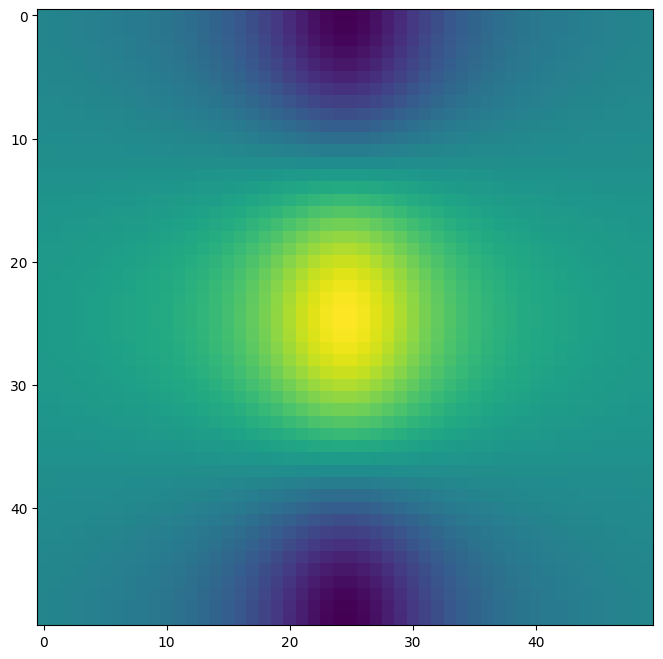

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(f);

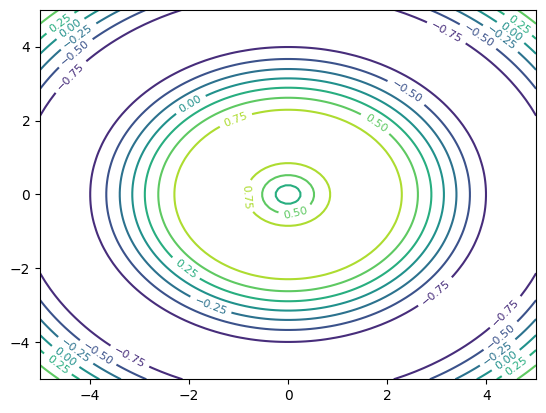

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 2차원 데이터 생성 (X, Y 좌표값 및 Z 값)
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# 등고선 플롯
fig, ax = plt.subplots()
contour = ax.contour(X, Y, Z)

# 등고선 레이블 추가 (선택 사항)
ax.clabel(contour, inline=True, fontsize=8)

# 플롯 보여주기
plt.show()


x

[-5.  -2.5  0.   2.5  5. ]
y

[-3. -1.  1.  3.]
X 좌표:
[[-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]]

Y 좌표:
[[-3. -3. -3. -3. -3.]
 [-1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.]
 [ 3.  3.  3.  3.  3.]]


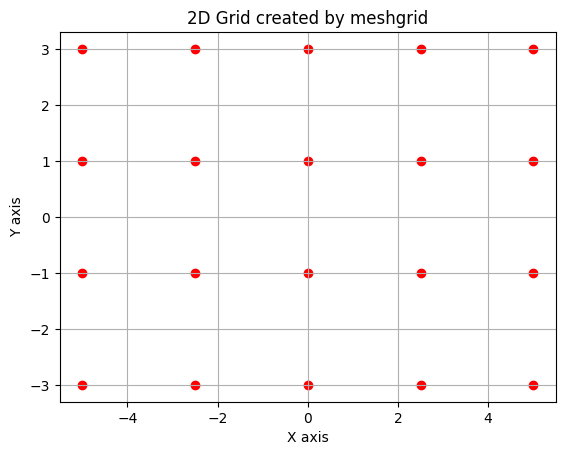

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1차원 배열 생성
x = np.linspace(-5, 5, 5)
y = np.linspace(-3, 3, 4)
print('x\n')
print(x)
print('y\n')
print(y)

# meshgrid로 2차원 그리드 생성
X, Y = np.meshgrid(x, y)

# 결과 확인
print("X 좌표:")
print(X)
print("\nY 좌표:")
print(Y)

# 생성된 그리드를 시각화하여 확인
plt.scatter(X, Y, color='r')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('2D Grid created by meshgrid')
plt.grid(True)
plt.show()


#2.3.5. Sequences and Slice Notation

In [ ]:
import numpy as np
seq1 = np.linspace(0, 10, 11) # 시작, 종료 , 개수
print(seq1)
seq2 = np.arange(0,10,2) #시작, 종료, Step
print(seq2)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[0 2 4 6 8]


In [ ]:
# 슬라이스 인덱싱은 0부터 시작
a = "0123456" #문자열
print(a[2:4])


23


#2.3.6 Indexing Data

In [ ]:
A = np.array(np.arange(16)).reshape((4, 4)) #0 부터 16 개숫자를 4열4행 행열로 만들기
print(A)
print("----0------")
print(A[1,2]) #[행,열]
print("----1------")
print(A[:,[0,2]])
print("-----2---")
print(A[0:-1,[0,2]]) #-1은 뒤에서 하나까지  ":" 범위
print("------3--")
print(A[-1:,[0,2]]) #-1은 뒤에서 하나부터  ":" 범위
print("------4--")
print(A[1:4:2,0:3:2]) #행1에서4까지2스탭씩, 열0에서3까지 2스텝씩


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
----0------
6
----1------
[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]]
-----2---
[[ 0  2]
 [ 4  6]
 [ 8 10]]
------3--
[[12 14]]
------4--
[[ 4  6]
 [12 14]]


In [ ]:
#Boolean Indexing
# np.zeros(shape, dtype=float, order='C') 행열을 0으로 초기화해주기
# shape: 배열의 형태 (튜플로 지정, 예: (행, 열))

keep_rows = np.zeros(A.shape[0], bool) #4열4행의 boolean 데이터 형태로 0:false 1:True
print(keep_rows)
keep_rows[[1,3]] = True # 2,4번째 값에 True할당
print(keep_rows)
# == 는 좌우 값(행열등 여러 형태)이 동일한지 체크함
print(np.all(keep_rows == np.array([0,1,0,1])))
keep_rows[[1]] = False # 2번째 값에 false할당
print(np.all(keep_rows == np.array([0,1,0,1])))
print(np.any(keep_rows == np.array([0,1,0,1])))

[False False False False]
[False  True False  True]
True
False
True


#2.3.7 Loading Data(pandas 이용) 일종의 엑셀 쉬트로 생각하면됨

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
files_path = '/content/drive/My Drive/Colab Notebooks/ISLP/files/'
import pandas as pd
file_name = files_path + 'Auto.csv'
Auto = pd.read_csv( file_name )
Auto


Mounted at /content/drive


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
file_name = files_path + 'Auto.data'
Auto = pd.read_csv(file_name, delim_whitespace=True) #공백 미확인값 ? 를 null 값으로 전환
print(Auto['horsepower'].sum())
Auto = pd.read_csv(file_name, na_values=['?'],delim_whitespace=True) #공백 미확인값 ? 를 null 값으로 전환
print(Auto['horsepower'].sum())

130.0165.0150.0150.0140.0198.0220.0215.0225.0190.0170.0160.0150.0225.095.0095.0097.0085.0088.0046.0087.0090.0095.00113.090.00215.0200.0210.0193.088.0090.0095.00?100.0105.0100.088.00100.0165.0175.0153.0150.0180.0170.0175.0110.072.00100.088.0086.0090.0070.0076.0065.0069.0060.0070.0095.0080.0054.0090.0086.00165.0175.0150.0153.0150.0208.0155.0160.0190.097.00150.0130.0140.0150.0112.076.0087.0069.0086.0092.0097.0080.0088.00175.0150.0145.0137.0150.0198.0150.0158.0150.0215.0225.0175.0105.0100.0100.088.0095.0046.00150.0167.0170.0180.0100.088.0072.0094.0090.0085.00107.090.00145.0230.049.0075.0091.00112.0150.0110.0122.0180.095.00?100.0100.067.0080.0065.0075.00100.0110.0105.0140.0150.0150.0140.0150.083.0067.0078.0052.0061.0075.0075.0075.0097.0093.0067.0095.00105.072.0072.00170.0145.0150.0148.0110.0105.0110.095.00110.0110.0129.075.0083.00100.078.0096.0071.0097.0097.0070.0090.0095.0088.0098.00115.053.0086.0081.0092.0079.0083.00140.0150.0120.0152.0100.0105.081.0090.0052.0060.0070.0053.00100.078.00110

In [ ]:
a,b = np.unique(Auto['horsepower'],return_counts=True)
print(a)
print(b)

[ 46.  48.  49.  52.  53.  54.  58.  60.  61.  62.  63.  64.  65.  66.
  67.  68.  69.  70.  71.  72.  74.  75.  76.  77.  78.  79.  80.  81.
  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.
  96.  97.  98. 100. 102. 103. 105. 107. 108. 110. 112. 113. 115. 116.
 120. 122. 125. 129. 130. 132. 133. 135. 137. 138. 139. 140. 142. 145.
 148. 149. 150. 152. 153. 155. 158. 160. 165. 167. 170. 175. 180. 190.
 193. 198. 200. 208. 210. 215. 220. 225. 230.  nan]
[ 2  3  1  4  2  1  2  5  1  2  3  1 10  1 12  6  3 12  5  6  3 14  4  1
  6  2  7  2  1  4  6  9  5  2 19  1 20  1  6  1  1 14  3  9  2 17  1  1
 12  1  1 18  3  1  5  1  4  1  3  2  5  1  1  1  1  1  2  7  1  7  1  1
 22  1  2  2  1  2  4  1  5  5  5  3  1  2  1  1  1  3  1  3  1  5]


In [ ]:
Auto_new = Auto.dropna()
print(Auto_new.shape)
print(Auto_new.columns)

(392, 9)
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


In [ ]:
Auto = Auto_new
print(Auto[:3])

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0  3504.0          12.0    70   
1  15.0          8         350.0       165.0  3693.0          11.5    70   
2  18.0          8         318.0       150.0  3436.0          11.0    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  


In [ ]:
idx_80 = Auto['year'] > 80
print(idx_80)
print(Auto[idx_80])#year 80인데이터만 가지는 서브셋
#print(Auto[:3])

0      False
1      False
2      False
3      False
4      False
       ...  
392     True
393     True
394     True
395     True
396     True
Name: year, Length: 392, dtype: bool
      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
338  27.2          4         135.0        84.0  2490.0          15.7    81   
339  26.6          4         151.0        84.0  2635.0          16.4    81   
340  25.8          4         156.0        92.0  2620.0          14.4    81   
341  23.5          6         173.0       110.0  2725.0          12.6    81   
342  30.0          4         135.0        84.0  2385.0          12.9    81   
343  39.1          4          79.0        58.0  1755.0          16.9    81   
344  39.0          4          86.0        64.0  1875.0          16.4    81   
345  35.1          4          81.0        60.0  1760.0          16.1    81   
346  32.3          4          97.0        67.0  2065.0          17.8    81   
347  37.0          4          85.0      